# Rules: 
### 1. Whenever number of todo reaches 10, Complete minimum of 5 todos.
### 2. Write Comments
### 3. Use Type Checked Function
### 4. Write Tests
### 5. Always write links in start of cell


# All TODO's Here

1. Write Tests for activation functions
2. Write generalized function for function ploting
3. Read about Calculas theorem about composite function. [Nested Function](#calculas_theorem)
4. Fix the Nested Functions with inner function more than one argument( no default)

## Functions:
* Funtions take input and produce a output
* Two exampple of functions are:
* * $ {f_1(x)} = {x^{2}} $
* * $ {f_2(x)} = {max(x,0)} $
* * $ {f_3(x)} = {max({\alpha}*x,x)} $

In [14]:
# Let us do all the imports here (Direct import later, specific import on top):
from typing import List, Callable
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Lets define input for these functions:
INPUT_RANGE = np.arange(-2,2,0.01)

In [3]:
# Lets define the function's here
def square_func(x: np.ndarray) -> np.ndarray:
    """
    This function's :
    * Input :  array of numbers:
    * Output:  array of numbers, each raise to power 2
    """
    
    return np.power(x,2)

In [4]:
# Let's test this function : 
input_array = [2,4,6]
output_array = [4,16,36]
solution = square_func(input_array)

np.testing.assert_array_equal(output_array, solution, "Array not equal")


In [5]:
# Lets define second function here
def maximum_func(x:np.ndarray) -> np.ndarray:
    '''
    This function's:
    * Input  : Array of nuumbers:
    * Output  : Array of numbers, each max of 0 or x
    '''
    
    return np.maximum(x,0)

In [6]:
# Lets test this function here
input_array = [2,-4, 10, 0]
output_array = [2,0,10,0]
solution = maximum_func(input_array)

np.testing.assert_array_equal(output_array, solution, "Array not equal")

## There is Difference is np.max and np.maximum:
* np.max() -> return maximum element in the vector passed as input
* np.maximum(x,y) -> returns maximum of x or y 

In [11]:
# Lets define third function here:
def leaky_relu_func(alpha: float, x: np.ndarray) -> np.ndarray:
    '''
    This is the implementation of the leaky relu function.
    
    @TODO: TEsting this function
    
    input: alpha:float, vector of numbers
    output: vector of number each with maximum of (alpha * input, input)
    '''
    return np.maximum(alpha*x, x)


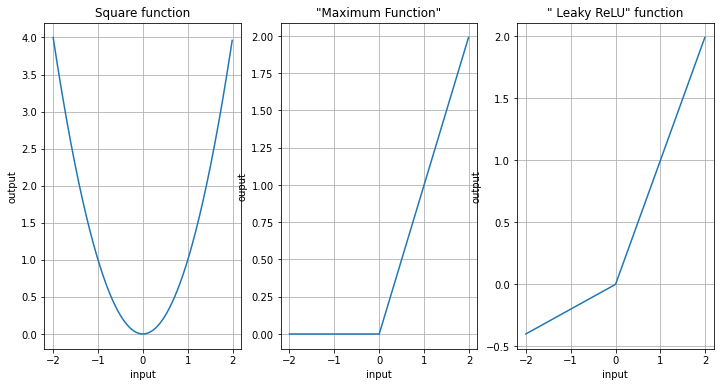

In [10]:
# Let's Plot these functions Here!!

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE,maximum_func(INPUT_RANGE))
ax[1].set_title('"Maximum Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, leaky_relu_func(0.2,INPUT_RANGE))
ax[2].set_title('" Leaky ReLU" function')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)


<a id='calculas_theorem'></a>
## Nested Functions or Composite Functions

* Functions can be nested to form composite functions
* For example: 
*  * If we have two functions $ {f_1} $ and  $ {f_2} $ and output of one function becomes input of second function, we call that **nested function**.  
* $ {y} = {f_1( f_2 (x) )} $
* Nested Functions are 
*  * read **from the outside in** but,
*  * operations are performed **from the inside out**.
* Above function will be read as : 
*  * **F 1 of F 2  of x**
*  * But it will be evaluated as: 
*  * Apply $ f_2 $ to x then apply $ f_1 $ to the result of it.

### Notes:
* A theorem in calculas tells us that,
*  * a composite function made up of "mostly differentiable" functions
*  * is itself mostly differentiable.


In [17]:
# Defining Datatypes required  for nested functions: 

# A function that takes in ndarray as an argument and produces an ndarray
Array_Function = Callable[[np.ndarray], np.ndarray]

# A chain is a list of functions
Chain = List[Array_Function]


In [30]:
def nested_len_2(chain: Chain,
                arr: np.ndarray) -> np.ndarray :
    """
       Takes two functions and evaluates them in row,
       i.e in a "Chain" or as in "nested"
    """
    
    # Lets check whether the length of chain is 2 or not
    assert len(chain) ==  2, "Length of input `chain` should be 2"
    
    f_1 = chain[0]
    f_2 = chain[1]
    
    #HACK 
#     try:
#         answer = f_2(f_1(arr))
#     except TypeError: 
#         answer = f_2(f_1(0.1,arr))
    
    # JUST USE LAMBDA IN CALLING THIS FUNCTION INSTEAD OF USING THIS TYPE OF HACK  
    
    return f_2(f_1(arr))

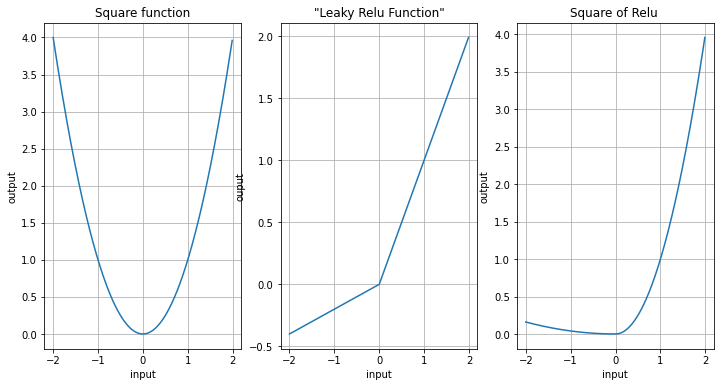

In [45]:
# Lets Square the LeakyRelu Function

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE, leaky_relu_func(0.2,INPUT_RANGE))
ax[1].set_title('"Leaky Relu Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, nested_len_2([lambda x: leaky_relu_func(0.2,x), square_func], INPUT_RANGE) )
ax[2].set_title('Square of Relu ')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)


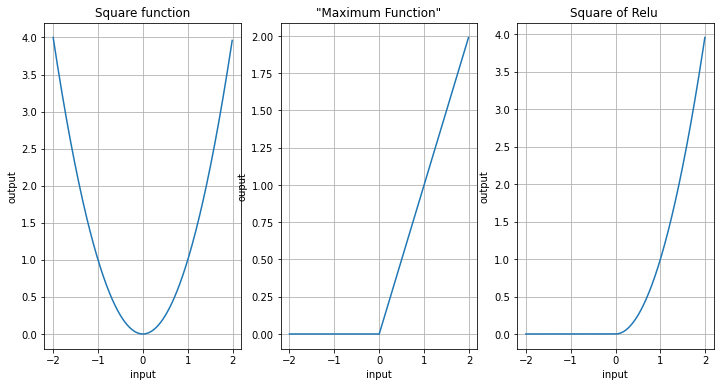

In [33]:
# Lets Square the Relu Function

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 6))  # 1 Rows, 3 Col

ax[0].plot(INPUT_RANGE, square_func(INPUT_RANGE))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')
ax[0].grid(True)

ax[1].plot(INPUT_RANGE, maximum_func(INPUT_RANGE))
ax[1].set_title('"Maximum Function"')
ax[1].set_xlabel('input')
ax[1].set_ylabel('ouput')
ax[1].grid(True)


ax[2].plot(INPUT_RANGE, nested_len_2([maximum_func,square_func], INPUT_RANGE) )
ax[2].set_title('Square of Relu ')
ax[2].set_xlabel('input')
ax[2].set_ylabel('output');
ax[2].grid(True)


## Derivatives
* Derivative of a function **at a point** is the: 
*  * **rate of change** of the output of the function with respect to its input at that point
* We can define this as:
*  * How much the output of the function changes  as we change its input at a particular value **a** with limit
*  *  $$ \frac{df}{dx}(a) = \lim_{\Delta \to 0} \frac{f(a + \Delta) - f(a - \Delta)}{2 \ *  \ \Delta} $$
* For Numerical Computation, we can set the value of $\Delta$ to very small to zero 
*  *  For example: $ {\Delta}$ = 0.0001
*  *  So the equation will be: 
*  *  $$ \frac{df}{dx}(a) = \frac{f(a+0.0001) - f(a-0.0001)}{2*0.0001} $$


In [37]:
def derivate(func : Callable[[np.ndarray], np.ndarray],
            input_ : np.ndarray,
            delta : float = 0.0001) -> np.ndarray:
    """
        Given a function :func, and input array :input_,
        this function calculates the derivative of the function at all
        the points in input array using delta.
        The value of delta is 0.0001 (default).
        Extra parameter of delta can be provided.
    """
    
    return (func(input_ + delta) -  func(input_ - delta)) / (2 * delta)
    

In [36]:
?plt.subplots

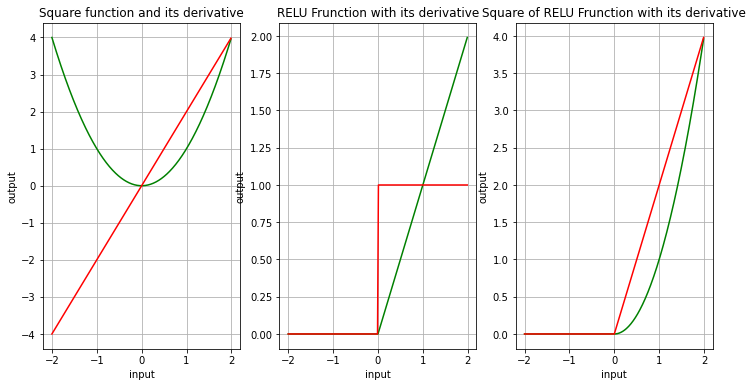

In [49]:
# Graph of functions with their derivative

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, figsize = (12, 6)) # 1 Row, 3 Col

ax1.plot(INPUT_RANGE, square_func(INPUT_RANGE), 'g')
ax1.plot(INPUT_RANGE, derivate(square_func, INPUT_RANGE), 'r')
ax1.set_title('Square function and its derivative')
ax1.set_xlabel('input')
ax1.set_ylabel('output')
ax1.grid(True)

ax2.plot(INPUT_RANGE, maximum_func(INPUT_RANGE), 'g')
ax2.plot(INPUT_RANGE, derivate(maximum_func, INPUT_RANGE), 'r')
ax2.set_title('RELU Frunction with its derivative')
ax2.set_xlabel('input')
ax2.set_ylabel('output')
ax2.grid(True)

# Derivative wihtout chain rule
ax3.plot(INPUT_RANGE, nested_len_2([maximum_func, square_func], INPUT_RANGE), 'g')
ax3.plot(INPUT_RANGE, derivate(lambda x: nested_len_2([maximum_func,square_func], x), INPUT_RANGE), 'r') 
ax3.set_title('Square of RELU Frunction with its derivative')
ax3.set_xlabel('input')
ax3.set_ylabel('output')
ax3.grid(True)